# Project
*Developed by Nuno M.C. da Costa*

info: 
- https://github.com/petercorke/robotics-toolbox-python
- https://petercorke.github.io/robotics-toolbox-python/intro.html
- https://github.com/jhavl/swift
- https://www.mathworks.com/products/robotics.html

## Setup - install

In [2]:
#Do this only one time, remove # and run the cell code. If not finished, copy paste to the anaconda-prompt.

#%conda activate iclasses
#%conda install -c conda-forge ipympl nodejs -y
#%pip install roboticstoolbox-python["vpython","collision","dev"] 


Note: you may need to restart the kernel to use updated packages.


In [3]:
%conda list robotics

# packages in environment at C:\Tools\miniconda3\envs\iclasses:
#
# Name                    Version                   Build  Channel
roboticstoolbox-python    0.11.0                   pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Necessary for 3D plots
%matplotlib widget
%matplotlib

Using matplotlib backend: module://ipympl.backend_nbagg


## Example

Resolved-Rate Motion Control

We will load a model of the Franka-Emika panda robot and make it travel towards a goal pose defined by the variable Tep.
This is a URDF model, the kinematic representation is not based on Denavit-Hartenberg parameters, it is a rigid-body tree.

1. Robot starts in the ready joint configuration: robot.fkine(robot.q)
2. Robot rotates in x axis: sm.SE3.Rx(-90, unit='deg')
3. Robot translates along the x axis: sm.SE3.Tx(0.2)
4. Robot translates along the y axis: sm.SE3.Ty(0.2)
5. Robot translates along the z axis: sm.SE3.Tz(0.45)

In [1]:
import roboticstoolbox as rtb
from roboticstoolbox.backends.swift import Swift
import spatialmath as sm
import numpy as np

# Make and instance of the Swift simulator and open it
env = Swift()
env.launch()

# Make a robot model and set its joint angles to the ready joint configuration
robot = rtb.models.URDF.Panda() #rtb.models.robot()
print(robot)    # display the model
robot.q = robot.qr #robot.q (joint configuration) set to robot.qr (ready configuration)

# Set a desired and effector pose an an offset from the current end-effector pose
Tep = robot.fkine(robot.q) * sm.SE3.Rx(-90, unit='deg') * sm.SE3.Tx(0.2) * sm.SE3.Ty(0.2) * sm.SE3.Tz(0.45)

# Add the robot to the simulator
env.add(robot)

# Simulate the robot while it has not arrived at the goal
arrived = False
while not arrived:

    # Work out the required end-effector velocity to go towards the goal
    v, arrived = rtb.p_servo(robot.fkine(robot.q), Tep, 1)
    v=1*v #changing velocity ,try 2*v
    
    # Set the robot's joint velocities
    robot.qd = np.linalg.pinv(robot.jacobe(robot.q)) @ v
    
    # Step the simulator by 0.0005 seconds
    env.step(0.0005)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), geometry, collision
┌───┬──────────────┬───────┬─────────────┬─────────────────────────────────────────────────────────────────────────────┐
│id │     link     │ joint │   parent    │                                     ETS                                     │
├───┼──────────────┼───────┼─────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ 1 │ panda_link0  │       │ BASE        │ {panda_link0} = {BASE}                                                      │
│ 2 │ panda_link1  │     0 │ panda_link0 │ {panda_link1} = {panda_link0} ⊕ tz(0.333) ⊕ Rz(q0)                          │
│ 3 │ panda_link2  │     1 │ panda_link1 │ {panda_link2} = {panda_link1} ⊕ Rx(-90°) ⊕ Rz(q1)                           │
│ 4 │ panda_link3  │     2 │ panda_link2 │ {panda_link3} = {panda_link2} ⊕ ty(-0.316) ⊕ Rx(90°) ⊕ Rz(q2)               │
│ 5 │ panda_link4  │     3 │ panda_link3 │ {panda_link4} = {panda_link3} ⊕ tx(0.

# SPATIAL MATHEMATICS
(T)Tranlations and (R)Rotations

   1         0         0         0.5       
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
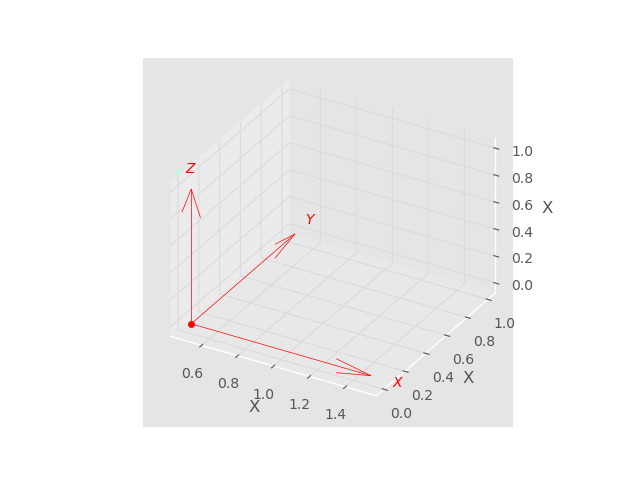

In [20]:
import spatialmath as sm
T = sm.SE3(0.5, 0.0, 0.0) # POINT IN 3D space
print(T)
%matplotlib widget
T.plot(color='red', label='2') #PLOT 3D Point

   1         0         0         0.5       
   0         0         1         0         
   0        -1         0         0         
   0         0         0         1         



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
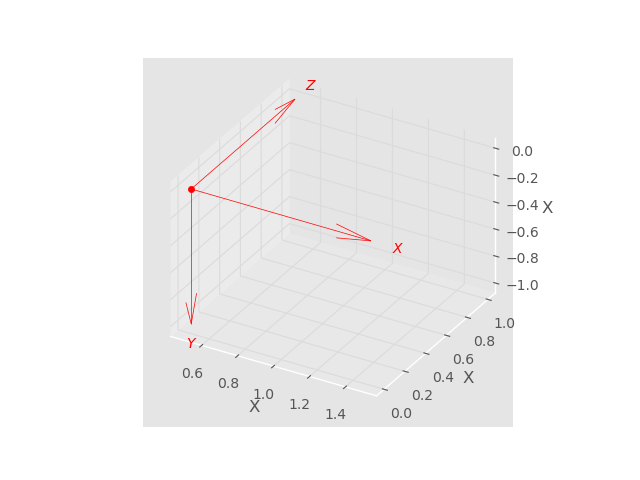

In [21]:
T = T * sm.SE3.Rx(-90, unit='deg')
print(T)
%matplotlib widget
T.plot(color='red', label='2') #PLOT 3D Point

   1         0         0         0.9       
   0         0         1         0         
   0        -1         0         0         
   0         0         0         1         



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
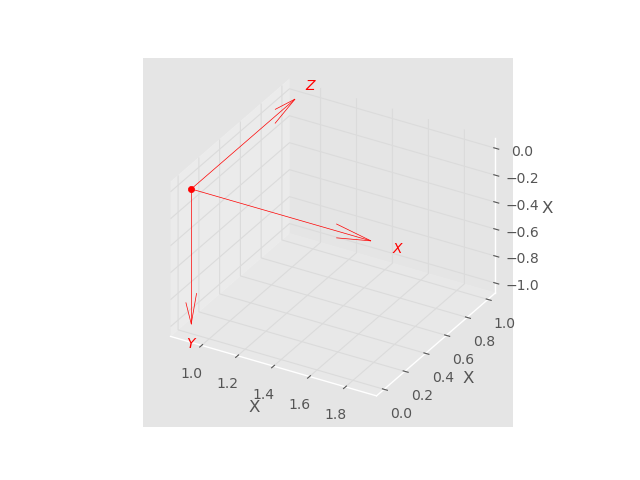

In [28]:
T = T * sm.SE3.Tx(0.2)
print(T)
%matplotlib widget
T.plot(color='red', label='2') #PLOT 3D Point

## More robot models
A list of all models currently defined in the Toolbox is given by

In [9]:
rtb.models.list()

   class              name              manufacturer      type  DoF  dims                        structure  dynamics  geometry          keywords          
Panda         Panda                  Franka Emika         DH    7    3d    RRRRRRR                          Y         Y                                   
Puma560       Puma 560               Unimation            DH    6    3d    RRRRRR                           Y         Y         dynamics, symbolic, mesh  
Stanford      Stanford arm           Victor Scheinman     DH    6    3d    RRPRRR                           Y                   dynamics                  
Ball          ball                                        DH    10   3d    RRRRRRRRRR                       Y                                             
Hyper         Hyper10                                     DH    10   3d    RRRRRRRRRR                       Y                   symbolic                  
Coil          Hyper10                                     DH    10   3

which highlights the three categories of robot models supported by the toolbox:

1. DH - expressed using standard or modified Denavit-Hartenberg parameters, and may include dynamic parameters, meshs and collision objects
2. ETS - expressed as a string of elementary transforms, does not support dynamic parameters
3. URDF - based on a URDF file with some additional meta-data, and may include dynamic parameters, meshs and collision objects

# Project Tasks


1. Pattern_1 : left
2. Pattern_2 : Up
3. Pattern_3 : circle 
4. Pattern_4 : rectangle
5. Pattern_5 : triangle
6. Print elapsed Time (5 in 5 seconds, use time.time() function) in all tasks; print total elapsed time at the end.
7. Mix_patern_1: ready position -> right -> ready position -> down > wait 5 s (print countdown) and print"Finished mix_pattern_1" at the end
8. Mix_patern_2: Patern_3 ->  ready position -> wait 5 s (print countdown)-> Patern_2 (2*velocity) -> Patern_5 (0.5*velocity) -> wait 5 s (print countdown) and print"Finished mix_pattern_2" at the end
9. Mix_patern_3: ready position-> Patern_3 (0.5*velocity) ->  wait 5 s (print countdown)-> ready position-> Patern_5(3*velocity) ->  ready position -> Patern_4(4*velocity) -> wait 5 s (print countdown) and print"Finished mix_pattern_3" at the end
10. Save all (from all code) print log messages strings into a list (use list.append() function); Save log list messages to a file at the end; Open save log list messages and print to the screen

Rules for more points:
- Make your code simple and tidy!
- Don't repeat the same code, reuse functions!
- Comment well your code like in the example above as well the functions that you define!
- Make global variables at the beginning of the code like PATTERN= "Pattern_1" that will serve to choose the pattern that we will see. 
- Use all that you learned to reduce the number of lines of code:
    - Lists (of numbers and of strings);
    - arrays;
    - loops: while and for;
    - functions (reuse functions);
    - class of functions.

# Avaliação

Avaliação de grupo:
- Apresentação do trabalho á turma: 10 min
- Avaliação do projecto

Avaliação individual:
- Perguntas individuais após apresentação: 2 min cada

Autoavaliação:
- Avaliação de cada membro do grupo incluindo o mesmo. 

